In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import math

In [58]:
f = "./diabetes.csv"
df = pd.read_csv(f)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df = df.rename(columns = {
    'Pregnancies': 'pregnancies'
    ,'Glucose': 'glucose'
    ,'BloodPressure': 'blood_pressure'
    , 'SkinThickness': 'skin_thickness'
    , 'Insulin': 'insulin'
    , 'BMI': 'bmi'
    , 'DiabetesPedigreeFunction': 'pedigree'
    , 'Age': 'age'
    ,'Outcome': 'outcome'
})
df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [60]:
cols_clean = ['glucose','blood_pressure','skin_thickness','insulin','bmi','pedigree']
for i in cols_clean:
    df[i] = df[i].replace(0,np.NaN)
    cols_mean = int(df[i].mean(skipna=True))
    df[i] = df[i].replace(np.NaN, cols_mean)
data1 = df
data1.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [61]:
data1.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


In [62]:
X1 = data1.iloc[:, [1, 2]].values
X2 = data1.iloc[:, [1, 4]].values
X3 = data1.iloc[:, [4, 5]].values
X4 = data1.iloc[:, [5, 6]].values
y = data1.iloc[:, [-1]].values

X1_train, X1_test, y_train, y_test = train_test_split(X1
                                                   , y
                                                   , test_size=0.2
                                                   , random_state=1)
X2_train, X2_test, y_train, y_test = train_test_split(X2
                                                   , y
                                                   , test_size=0.2
                                                   , random_state=1)
X3_train, X3_test, y_train, y_test = train_test_split(X3
                                                   , y
                                                   , test_size=0.2
                                                   , random_state=1)
X4_train, X4_test, y_train, y_test = train_test_split(X4
                                                   , y
                                                   , test_size=0.2
                                                   , random_state=1)

In [63]:
def knn(X_train, y_train, X_test, y_test,n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)
        results.append(accuracy)
    return results

Accuracy: 81.24675324675324 %


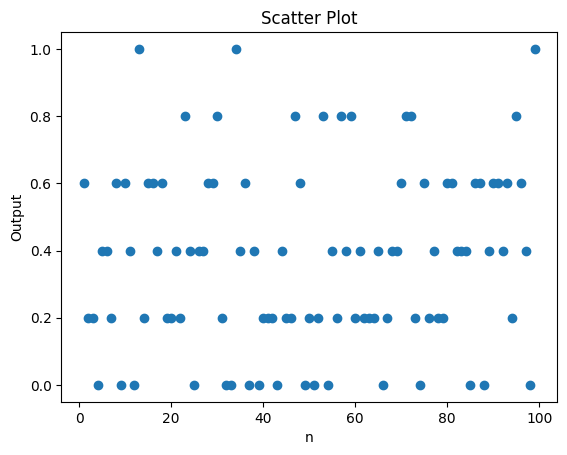

In [64]:
import warnings
warnings.filterwarnings("ignore")
n = 100

# Create and fit the KNeighborsRegressor model
knn = KNeighborsRegressor()
knn.fit(X1_train, y_train)

# Predict the output for X1_test
output = knn.predict(X1_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, output)
print("Accuracy:", 100 - mse * 100, "%")

n_range = range(1, n)
n_range = np.array(list(n_range))  # Convert n_range to a numpy array
output = output[:n-1]  # Truncate the output array to match the size of n_range

plt.scatter(n_range, output)
plt.xlabel('n')
plt.ylabel('Output')
plt.title('Scatter Plot')
plt.show()

Accuracy: 80.98701298701299 %


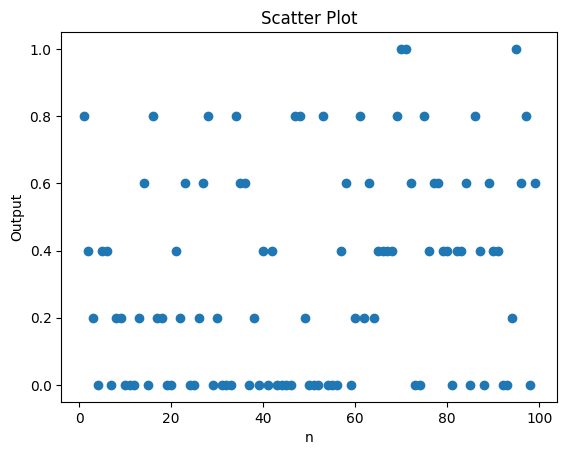

In [65]:
import warnings
warnings.filterwarnings("ignore")
n = 100

# Create and fit the KNeighborsRegressor model
knn = KNeighborsRegressor()
knn.fit(X2_train, y_train)

# Predict the output for X1_test
output = knn.predict(X2_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, output)
print("Accuracy:", 100 - mse * 100, "%")

n_range = range(1, n)
n_range = np.array(list(n_range))  # Convert n_range to a numpy array
output = output[:n-1]  # Truncate the output array to match the size of n_range

plt.scatter(n_range, output)
plt.xlabel('n')
plt.ylabel('Output')
plt.title('Scatter Plot')
plt.show()

Accuracy: 77.40259740259741 %


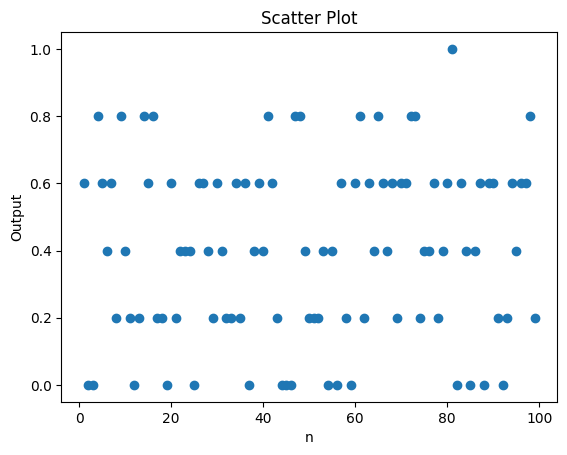

In [66]:
import warnings
warnings.filterwarnings("ignore")
n = 100

# Create and fit the KNeighborsRegressor model
knn = KNeighborsRegressor()
knn.fit(X3_train, y_train)

# Predict the output for X1_test
output = knn.predict(X3_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, output)
print("Accuracy:", 100 - mse * 100, "%")

n_range = range(1, n)
n_range = np.array(list(n_range))  # Convert n_range to a numpy array
output = output[:n-1]  # Truncate the output array to match the size of n_range

plt.scatter(n_range, output)
plt.xlabel('n')
plt.ylabel('Output')
plt.title('Scatter Plot')
plt.show()

Accuracy: 76.25974025974025 %


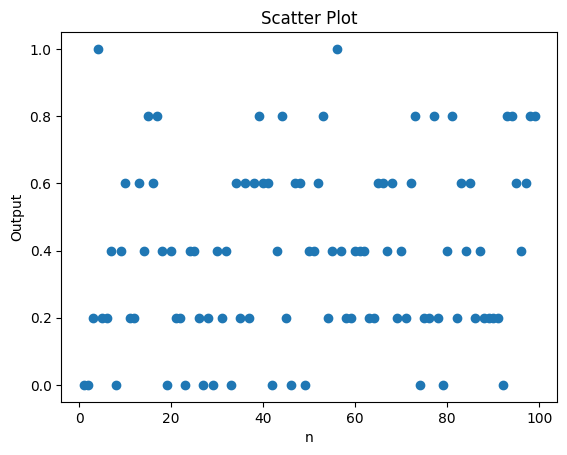

In [67]:
import warnings
warnings.filterwarnings("ignore")
n = 100

# Create and fit the KNeighborsRegressor model
knn = KNeighborsRegressor()
knn.fit(X4_train, y_train)

# Predict the output for X1_test
output = knn.predict(X4_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, output)
print("Accuracy:", 100 - mse * 100, "%")

n_range = range(1, n)
n_range = np.array(list(n_range))  # Convert n_range to a numpy array
output = output[:n-1]  # Truncate the output array to match the size of n_range

plt.scatter(n_range, output)
plt.xlabel('n')
plt.ylabel('Output')
plt.title('Scatter Plot')
plt.show()

In [68]:
dx = data1.iloc[:, [1, 2, 4, 5, 7]].values

feature_combinations = {
     'a': [0, 1]
    ,'b': [0, 2]
    ,'c': [0, 4]
    ,'d': [2, 3]
    ,'e': [2, 4]
    ,'A': [0, 1]
    ,'B': [0, 2]
    ,'C': [0, 4]
    ,'D': [2, 3]
    ,'E': [2, 4]
}

# Get user input for the selected feature combination
choice = input("Enter the choice of feature combination (A. Glucose and Blood Pressure, B. Glucose and Insulin, C. Glucose and Age, D. Insulin and BMI, E. Insulin and Age): ")

if choice in feature_combinations:
    # Get the feature indices based on the selected combination
    feature_indices = feature_combinations[choice]

    # Get the features and labels from the dataset
    X = dx[:, feature_indices]
    y = df.iloc[:, -1].astype(int)  # Convert y to integers

    # Get user input for the feature values
    feature_values = []
    feature_titles = ['Glucose', 'Blood Pressure', 'Insulin', 'BMI', 'Age']
    for i in feature_indices:
        value = float(input(f"Enter the value for {feature_titles[i]}: "))
        feature_values.append(value)

    # Create the user input array
    user_input = np.array(feature_values).reshape(1, -1)

    # Perform K Nearest Neighbor Aggregation
    knn = KNeighborsClassifier(n_neighbors=100)
    knn.fit(X, y)
    distances, indices = knn.kneighbors(user_input)
    nearest_labels = y[indices.flatten()]
    prediction = np.argmax(np.bincount(nearest_labels))

    if prediction == 0:
        print("The patient is not diabetic.")
    else:
        print("The patient is diabetic.")
else:
    print("Invalid choice of feature combination.")

Invalid choice of feature combination.


In [69]:
# import tkinter as tk
# import pandas as pd
# import customtkinter

# customtkinter.set_appearance_mode("System")  # Modes: "System" (standard), "Dark", "Light"
# customtkinter.set_default_color_theme("blue")  # Themes: "blue" (standard), "green", "dark-blue"

# class App(customtkinter.CTk):
#     def __init__(self):
#         super().__init__()

#         self.title("Diabetes Identifier")
#         self.geometry(f"{1100}x{680}")

#         self.grid_columnconfigure(1, weight=1)
#         self.grid_columnconfigure(2, weight=1)
#         self.grid_rowconfigure((0, 1), weight=1)

#         self.sidebar_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
#         self.sidebar_frame.grid(row=0, column=0, rowspan=13, sticky="nsew")
#         self.results_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
#         self.results_frame.grid(row=0, column=1, rowspan=5, columnspan=2, sticky="nsew")
#         self.aggregate_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
#         self.aggregate_frame.grid(row=1, column=1, rowspan=2, columnspan=1, sticky="nsew")

#         self.sidebar_frame.grid_rowconfigure(0, weight=0)
#         self.sidebar_frame.grid_rowconfigure((1, 13), weight=1)

#         self.logo_label = customtkinter.CTkLabel(self.sidebar_frame, text="Patient Info", font=customtkinter.CTkFont(size=20, weight="bold"))
#         self.logo_label.grid(row=0, column=0, padx=20, pady=(20, 10))

#         self.label_Glucose = customtkinter.CTkLabel(self.sidebar_frame, text="Enter Glucose Reading (0-199): ")
#         self.label_Glucose.grid(row=1, column=0, columnspan=1, padx=10, pady=(20, 10), sticky="")
#         self.Glucosetextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
#         self.Glucosetextbox.grid(row=2, column=0, pady=(0, 10))

#         self.label_BloodPressure = customtkinter.CTkLabel(self.sidebar_frame, text="Enter Blood Pressure Reading (0-122):")
#         self.label_BloodPressure.grid(row=3, column=0, columnspan=1, padx=10, pady=(10, 10), sticky="")
#         self.BloodPressuretextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
#         self.BloodPressuretextbox.grid(row=4, column=0, pady=(0, 10))

#         self.label_Insulin = customtkinter.CTkLabel(self.sidebar_frame, text="Enter Insulin Reading (0-846):")
#         self.label_Insulin.grid(row=5, column=0, columnspan=1, padx=10, pady=(10, 10), sticky="")
#         self.Insulintextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
#         self.Insulintextbox.grid(row=6, column=0, pady=(0, 10))

#         self.label_Age = customtkinter.CTkLabel(self.sidebar_frame, text="Enter Age Reading (21-81):")
#         self.label_Age.grid(row=7, column=0, columnspan=1, padx=10, pady=(10, 10), sticky="")
#         self.Agetextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
#         self.Agetextbox.grid(row=8, column=0, pady=(0, 10))

#         self.label_BMI = customtkinter.CTkLabel(self.sidebar_frame, text="Enter BMI Reading:")
#         self.label_BMI.grid(row=9, column=0, columnspan=1, padx=10, pady=(10, 20), sticky="")
#         self.BMItextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
#         self.BMItextbox.grid(row=10, column=0, pady=(0, 10))

#         self.sidebar_button_1 = customtkinter.CTkButton(self.sidebar_frame, text="Submit", command=lambda: self.Diabetes_Identify())
#         self.sidebar_button_1.grid(row=13, column=0, pady=(0,10))

#         self.label_FeatureSet = customtkinter.CTkLabel(self.results_frame, text="Feature Set", font=customtkinter.CTkFont(size=20, weight="bold"))
#         self.label_FeatureSet.grid(row=0, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
#         self.label_GlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Glucose - Blood Pressure")
#         self.label_GlucoseBP.grid(row=1, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
#         self.label_GlucoseInsulin = customtkinter.CTkLabel(self.results_frame, text="Glucose - Insulin")
#         self.label_GlucoseInsulin.grid(row=2, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
#         self.label_GlucoseAge = customtkinter.CTkLabel(self.results_frame, text="Glucose - Age")
#         self.label_GlucoseAge.grid(row=3, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
#         self.label_InsulinBMI = customtkinter.CTkLabel(self.results_frame, text="Insulin - BMI")
#         self.label_InsulinBMI.grid(row=4, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
#         self.label_InsulinAge = customtkinter.CTkLabel(self.results_frame, text="Insulin - Age")
#         self.label_InsulinAge.grid(row=5, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

#         self.label_Prediction = customtkinter.CTkLabel(self.results_frame, text="Prediction", font=customtkinter.CTkFont(size=20, weight="bold"))
#         self.label_Prediction.grid(row=0, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

#         self.label_Results = customtkinter.CTkLabel(self.aggregate_frame, text="Results", font=customtkinter.CTkFont(size=30, weight="bold"))
#         self.label_Results.grid(row=0, padx=100, pady=(20, 10), sticky="")
#         self.label_PredictionOverall = customtkinter.CTkLabel(self.aggregate_frame, text="Diabetic", font=customtkinter.CTkFont(size=20))
#         self.label_PredictionOverall.grid(row=1, padx=100, pady=(20, 10), sticky="")

#     def Diabetes_Identify(self):
#         glucose_input = self.Glucosetextbox.get("1.0", "end-1c")
#         blood_pressure_input = self.BloodPressuretextbox.get("1.0", "end-1c")
#         insulin_input = self.Insulintextbox.get("1.0", "end-1c")
#         bmi_input = self.BMItextbox.get("1.0", "end-1c")
#         age_input = self.Agetextbox.get("1.0", "end-1c")

#         numeric_columns = ['glucose', 'blood_pressure', 'insulin', 'age', 'bmi']
#         data1 = pd.DataFrame({'glucose': [glucose_input], 'blood_pressure': [blood_pressure_input], 'insulin': [insulin_input], 'age': [age_input], 'bmi': [bmi_input]})
#         data1[numeric_columns] = data1[numeric_columns].apply(pd.to_numeric, errors='coerce')

#         dx = data1.iloc[:, [1, 2, 4, 5, 7]].values
#         feature_combinations = {
#             'a': [0, 1],  # Glucose and Blood Pressure
#             'b': [0, 2],  # Glucose and Insulin
#             'c': [0, 4],  # Glucose and Age
#             'd': [2, 3],  # Insulin and BMI
#             'e': [2, 4]  # Insulin and Age
#         }
        
#         # Glucose and Blood Pressure
#         if 'a' in feature_combinations:
#             glucose_bp = dx[:, feature_combinations['a']]
#             print("Glucose - Blood Pressure:", glucose_bp)

#         # Glucose and Insulin
#         if 'b' in feature_combinations:
#             glucose_insulin = dx[:, feature_combinations['b']]
#             print("Glucose - Insulin:", glucose_insulin)

#         # Glucose and Age
#         if 'c' in feature_combinations:
#             glucose_age = dx[:, feature_combinations['c']]
#             print("Glucose - Age:", glucose_age)

#         # Insulin and BMI
#         if 'd' in feature_combinations:
#             insulin_bmi = dx[:, feature_combinations['d']]
#             print("Insulin - BMI:", insulin_bmi)

#         # Insulin and Age
#         if 'e' in feature_combinations:
#             insulin_age = dx[:, feature_combinations['e']]
#             print("Insulin - Age:", insulin_age)

# app = App()
# app.mainloop()

In [74]:
import tkinter as tk
import customtkinter
import pandas as pd

customtkinter.set_appearance_mode("System")  # Modes: "System" (standard), "Dark", "Light")
customtkinter.set_default_color_theme("blue")  # Themes: "blue" (standard), "green", "dark-blue")

class App(customtkinter.CTk):
    def __init__(self):
        super().__init__()

        # configure window
        self.title("Diabetes Identifier")
        self.geometry(f"{1100}x{680}")

        # configure grid layout (5x4)
        self.grid_rowconfigure(0, weight=1)

        # create sidebar frame with widgets
        self.sidebar_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
        self.sidebar_frame.grid(row=0, column=0, rowspan=13, sticky="nsew")
        self.results_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
        self.results_frame.grid(row=0, column=1, rowspan=5, columnspan=2, sticky="nsew")
        self.aggregate_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
        self.aggregate_frame.grid(row=1, column=1, rowspan=2, columnspan=1, sticky="nsew")

        # configure grid layout for sidebar frame
        self.sidebar_frame.grid_rowconfigure((1, 13), weight=1)

        self.logo_label = customtkinter.CTkLabel(self.sidebar_frame, text="Patient Info", font=customtkinter.CTkFont(size=20,weight="bold"))
        self.logo_label.grid(row=0, column=0, padx=20, pady=(20, 10))

        # Text Field
        self.label_Glucose = customtkinter.CTkLabel(self.sidebar_frame, text="Enter Glucose Reading (0-199): ")
        self.label_Glucose.grid(row=1, column=0, columnspan=1, padx=10, pady=(20, 10), sticky="")
        self.Glucosetextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
        self.Glucosetextbox.grid(row=2, column=0, pady=(0, 10))

        self.label_BloodPressure = customtkinter.CTkLabel(self.sidebar_frame, text="Enter Blood Pressure Reading (0-122):")
        self.label_BloodPressure.grid(row=3, column=0, columnspan=1, padx=10, pady=(10, 10), sticky="")
        self.BloodPressuretextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
        self.BloodPressuretextbox.grid(row=4, column=0, pady=(0, 10))

        self.label_Insulin = customtkinter.CTkLabel(self.sidebar_frame, text="Enter Insulin Reading (0-846):")
        self.label_Insulin.grid(row=5, column=0, columnspan=1, padx=10, pady=(10, 10), sticky="")
        self.Insulintextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
        self.Insulintextbox.grid(row=6, column=0, pady=(0, 10))

        self.label_Age = customtkinter.CTkLabel(self.sidebar_frame, text="Enter Age Reading (21-81):")
        self.label_Age.grid(row=7, column=0, columnspan=1, padx=10, pady=(10, 10), sticky="")
        self.Agetextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
        self.Agetextbox.grid(row=8, column=0, pady=(0, 10))

        self.label_BMI = customtkinter.CTkLabel(self.sidebar_frame, text="Enter BMI Reading:")
        self.label_BMI.grid(row=9, column=0, columnspan=1, padx=10, pady=(10, 20), sticky="")
        self.BMItextbox = customtkinter.CTkTextbox(self.sidebar_frame, width=150, height=10)
        self.BMItextbox.grid(row=10, column=0, pady=(0, 10))

        self.sidebar_button_1 = customtkinter.CTkButton(self.sidebar_frame, text="Submit", command=self.Diabetes_Identify)
        self.sidebar_button_1.grid(row=13, column=0, pady=(0, 10))

        # Show Table Feature Set
        self.label_FeatureSet = customtkinter.CTkLabel(self.results_frame, text="Feature Set",
                                                       font=customtkinter.CTkFont(size=20, weight="bold"))
        self.label_FeatureSet.grid(row=0, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        self.label_GlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Glucose - Blood Pressure")
        self.label_GlucoseBP.grid(row=1, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        self.label_GlucoseInsulin = customtkinter.CTkLabel(self.results_frame, text="Glucose - Insulin")
        self.label_GlucoseInsulin.grid(row=2, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        self.label_GlucoseAge = customtkinter.CTkLabel(self.results_frame, text="Glucose - Age")
        self.label_GlucoseAge.grid(row=3, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        self.label_InsulinBMI = customtkinter.CTkLabel(self.results_frame, text="Insulin - BMI")
        self.label_InsulinBMI.grid(row=4, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        self.label_InsulinAge = customtkinter.CTkLabel(self.results_frame, text="Insulin - Age")
        self.label_InsulinAge.grid(row=5, column=1, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

        # Show Table Prediction
        self.label_Prediction = customtkinter.CTkLabel(self.results_frame, text="Prediction",
                                                       font=customtkinter.CTkFont(size=20, weight="bold"))
        self.label_Prediction.grid(row=0, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

        # Show Aggregated Prediction
        self.label_Results = customtkinter.CTkLabel(self.aggregate_frame, text="Results",
                                                    font=customtkinter.CTkFont(size=30, weight="bold"))
        self.label_Results.grid(row=0, padx=100, pady=(20, 10), sticky="")

    def Diabetes_Identify(self):
        d = 0
        nd = 0
        increment = 1
        glucose_input = self.Glucosetextbox.get("1.0", "end-1c")
        blood_pressure_input = self.BloodPressuretextbox.get("1.0", "end-1c")
        insulin_input = self.Insulintextbox.get("1.0", "end-1c")
        bmi_input = self.BMItextbox.get("1.0", "end-1c")
        age_input = self.Agetextbox.get("1.0", "end-1c")

        # Convert input values to numeric
        numeric_columns = ['glucose', 'blood_pressure', 'insulin', 'age', 'bmi']
        data1[numeric_columns] = data1[numeric_columns].apply(pd.to_numeric, errors='coerce')

        dx = data1.iloc[:, [1, 2, 4, 5, 7, 8]].values
        feature_combinations = {
            'a': [0, 1, 5],  # Glucose and Blood Pressure
            'b': [0, 2, 5],  # Glucose and Insulin
            'c': [0, 4, 5],  # Glucose and Age
            'd': [2, 3, 5],  # Insulin and BMI
            'e': [2, 4, 5]  # Insulin and Age
        }

        # Glucose and Blood Pressure
        glucose_bp = dx[:, feature_combinations['a']]
        print("Glucose - Blood Pressure:", glucose_bp)
        prediction = glucose_bp[-1, 0]
        if prediction == 0:
            d =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Not Diabetic")
            self.label_PredictionGlucoseBP.grid(row=1, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        else:
            nd =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Diabetic")
            self.label_PredictionGlucoseBP.grid(row=1, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

        # Glucose and Insulin
        glucose_insulin = dx[:, feature_combinations['b']]
        print("Glucose - Insulin:", glucose_insulin)
        prediction = glucose_insulin[-1, 0]
        if prediction == 0:
            d =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Not Diabetic")
            self.label_PredictionGlucoseBP.grid(row=2, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        else:
            nd =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Diabetic")
            self.label_PredictionGlucoseBP.grid(row=2, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

        # Glucose and Age
        glucose_age = dx[:, feature_combinations['c']]
        print("Glucose - Age:", glucose_age)
        prediction = glucose_age[-1, 0]
        if prediction == 0:
            d =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Not Diabetic")
            self.label_PredictionGlucoseBP.grid(row=3, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        else:
            nd =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Diabetic")
            self.label_PredictionGlucoseBP.grid(row=3, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

        # Insulin and BMI
        insulin_bmi = dx[:, feature_combinations['d']]
        print("Insulin - BMI:", insulin_bmi)
        prediction = insulin_bmi[-1, 0]
        if prediction == 0:
            d =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Not Diabetic")
            self.label_PredictionGlucoseBP.grid(row=4, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        else:
            nd =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Diabetic")
            self.label_PredictionGlucoseBP.grid(row=4, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

        # Insulin and Age
        insulin_age = dx[:, feature_combinations['e']]
        print("Insulin - Age:", insulin_age)
        prediction = insulin_age[-1, 0]
        if prediction == 0:
            d =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Not Diabetic")
            self.label_PredictionGlucoseBP.grid(row=5, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")
        else:
            nd =+ increment
            self.label_PredictionGlucoseBP = customtkinter.CTkLabel(self.results_frame, text="Diabetic")
            self.label_PredictionGlucoseBP.grid(row=5, column=2, columnspan=1, padx=10, pady=(20, 10), sticky="nsew")

        if d > nd:
            self.label_PredictionOverall = customtkinter.CTkLabel(self.aggregate_frame, text="Diabetic",
                                                                font=customtkinter.CTkFont(size=20))
            self.label_PredictionOverall.grid(row=1, padx=100, pady=(20, 10), sticky="")
        
        if nd > d:
            self.label_PredictionOverall = customtkinter.CTkLabel(self.aggregate_frame, text="Not Diabetic",
                                                                font=customtkinter.CTkFont(size=20))
            self.label_PredictionOverall.grid(row=1, padx=100, pady=(20, 10), sticky="")

        if nd == d:
            self.label_PredictionOverall = customtkinter.CTkLabel(self.aggregate_frame, text="Cannot Be Determined",
                                                                font=customtkinter.CTkFont(size=20))
            self.label_PredictionOverall.grid(row=1, padx=100, pady=(20, 10), sticky="")



# Create an instance of the App class
app = App()
# Start the main event loop
app.mainloop()

Glucose - Blood Pressure: [[148.  72.   1.]
 [ 85.  66.   0.]
 [183.  64.   1.]
 ...
 [121.  72.   0.]
 [126.  60.   1.]
 [ 93.  70.   0.]]
Glucose - Insulin: [[148. 155.   1.]
 [ 85. 155.   0.]
 [183. 155.   1.]
 ...
 [121. 112.   0.]
 [126. 155.   1.]
 [ 93. 155.   0.]]
Glucose - Age: [[148.  50.   1.]
 [ 85.  31.   0.]
 [183.  32.   1.]
 ...
 [121.  30.   0.]
 [126.  47.   1.]
 [ 93.  23.   0.]]
Insulin - BMI: [[155.   33.6   1. ]
 [155.   26.6   0. ]
 [155.   23.3   1. ]
 ...
 [112.   26.2   0. ]
 [155.   30.1   1. ]
 [155.   30.4   0. ]]
Insulin - Age: [[155.  50.   1.]
 [155.  31.   0.]
 [155.  32.   1.]
 ...
 [112.  30.   0.]
 [155.  47.   1.]
 [155.  23.   0.]]


KeyboardInterrupt: 